In [3]:
import pandas as pd

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Rakamin/VIX/ID X Partner/preprocessedData.csv')
#df.dropna(inplace=True)

X = df.copy()
X.drop(columns=['good_indicator', 'bad_indicator'], inplace=True)

y = df[['bad_indicator']]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466281 entries, 0 to 466280
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   delinq_2yrs                          466281 non-null  float64
 1   loan_amnt                            466281 non-null  float64
 2   inq_last_6mths                       466281 non-null  float64
 3   dti                                  466281 non-null  float64
 4   open_acc                             466281 non-null  float64
 5   collections_12_mths_ex_med           466281 non-null  float64
 6   pub_rec                              466281 non-null  float64
 7   annual_inc                           466281 non-null  float64
 8   bad_indicator                        466281 non-null  int64  
 9   good_indicator                       466281 non-null  int64  
 10  purpose_car                          466281 non-null  int64  
 11  purpose_credi

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, refit= 'accuracy')
grid_result = grid_search.fit(X, y.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
prec = grid_result.cv_results_['mean_test_precision_macro']
rec = grid_result.cv_results_['mean_test_recall_macro']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for prec, rec, mean, stdev, param in zip( prec, rec, means, stds, params):
    print("prec %f, recall %f, mean %f (%f) with: %r" % (prec, rec, means, stdev, param))

ERROR:concurrent.futures:exception calling callback for <Future at 0x7f47ed955510 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 834, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.10/dist-packages/joblib/_parallel_backends.py", line 556, in apply_async
    future = self._workers.submit(SafeFunction(

TerminatedWorkerError: ignored

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, f1_score


kf = KFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X[list[train_index]]
    y_train = y[list[train_index]]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X[list[test_index]]
    y_test = y[list[test_index]]  # See comment on ravel and  y_train
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model = DecisionTreeClassifier()  # Choose a model here
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict(X_test)
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    print(f'precision: {precision_score(y_test, y_pred)}')
    print(f'recall: {recall_score(y_test, y_pred)}')
    print(f'f-score: {f1_score(y_test, y_pred)}')
 
    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    print(conf_matrix)
    print('')
    print('========================================')

For fold 1:
Accuracy: 0.9999987925476038
precision: 1.0
recall: 0.9999975850952076
f-score: 0.9999987925461459
[[414095      0]
 [     1 414094]]

For fold 2:
Accuracy: 0.9999987925476038
precision: 1.0
recall: 0.9999975850952076
f-score: 0.9999987925461459
[[414095      0]
 [     1 414094]]

For fold 3:
Accuracy: 0.9999987925476038
precision: 1.0
recall: 0.9999975850952076
f-score: 0.9999987925461459
[[414095      0]
 [     1 414094]]

For fold 4:
Accuracy: 0.9999987925476038
precision: 1.0
recall: 0.9999975850952076
f-score: 0.9999987925461459
[[414095      0]
 [     1 414094]]

For fold 5:
Accuracy: 0.9999987925476038
precision: 1.0
recall: 0.9999975850952076
f-score: 0.9999987925461459
[[414095      0]
 [     1 414094]]



In [18]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X[list[train_index]]
    y_train = y[list[train_index]]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X[list[test_index]]
    y_test = y[list[test_index]]  # See comment on ravel and  y_train
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model = RandomForestClassifier()  # Choose a model here
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict(X_test)
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    print(f'precision: {precision_score(y_test, y_pred)}')
    print(f'recall: {recall_score(y_test, y_pred)}')
    print(f'f-score: {f1_score(y_test, y_pred)}')
 
    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    print(conf_matrix)
    print('')
    print('========================================')

<ipython-input-18-e57fbf48d41e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_oversampled, y_train_oversampled )


For fold 1:
Accuracy: 0.9999963776428115
precision: 1.0
recall: 0.9999927552856228
f-score: 0.99999637762969
[[414095      0]
 [     3 414092]]



<ipython-input-18-e57fbf48d41e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_oversampled, y_train_oversampled )


For fold 2:
Accuracy: 0.9999975850952076
precision: 1.0
recall: 0.9999951701904153
f-score: 0.9999975850893759
[[414095      0]
 [     2 414093]]



<ipython-input-18-e57fbf48d41e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_oversampled, y_train_oversampled )


For fold 3:
Accuracy: 0.9999939627380191
precision: 1.0
recall: 0.9999879254760381
f-score: 0.9999939627015704
[[414095      0]
 [     5 414090]]



<ipython-input-18-e57fbf48d41e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_oversampled, y_train_oversampled )


For fold 4:
Accuracy: 0.9999927552856228
precision: 1.0
recall: 0.9999855105712457
f-score: 0.9999927552331366
[[414095      0]
 [     6 414089]]



<ipython-input-18-e57fbf48d41e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_oversampled, y_train_oversampled )


For fold 5:
Accuracy: 0.9999963776428115
precision: 0.9999975850893759
recall: 0.9999951701904153
f-score: 0.9999963776384376
[[414094      1]
 [     2 414093]]



In [19]:
from xgboost import XGBClassifier

kf = KFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X[list[train_index]]
    y_train = y[list[train_index]]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X[list[test_index]]
    y_test = y[list[test_index]]  # See comment on ravel and  y_train
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model = XGBClassifier()  # Choose a model here
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict(X_test)
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    print(f'precision: {precision_score(y_test, y_pred)}')
    print(f'recall: {recall_score(y_test, y_pred)}')
    print(f'f-score: {f1_score(y_test, y_pred)}')
 
    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    print(conf_matrix)
    print('')
    print('========================================')

For fold 1:
Accuracy: 0.9192528284572381
precision: 0.9967808487685673
recall: 0.841222424805902
f-score: 0.9124188347831098
[[412970   1125]
 [ 65749 348346]]

For fold 2:
Accuracy: 0.9192528284572381
precision: 0.9967808487685673
recall: 0.841222424805902
f-score: 0.9124188347831098
[[412970   1125]
 [ 65749 348346]]

For fold 3:
Accuracy: 0.9192528284572381
precision: 0.9967808487685673
recall: 0.841222424805902
f-score: 0.9124188347831098
[[412970   1125]
 [ 65749 348346]]

For fold 4:
Accuracy: 0.9192528284572381
precision: 0.9967808487685673
recall: 0.841222424805902
f-score: 0.9124188347831098
[[412970   1125]
 [ 65749 348346]]

For fold 5:
Accuracy: 0.9192528284572381
precision: 0.9967808487685673
recall: 0.841222424805902
f-score: 0.9124188347831098
[[412970   1125]
 [ 65749 348346]]



In [20]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = XGBClassifier()
# evaluate model
scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
print(pd.DataFrame(scores))

     fit_time  score_time  test_accuracy  test_precision  test_recall  \
0  539.876410    1.468054       0.918207        0.995687     0.839883   
1  539.019197    1.265554       0.917102        0.996989     0.836527   
2  535.784415    2.028502       0.918901        0.995192     0.841531   
3  540.510267    1.237698       0.916130        0.996484     0.835173   
4  293.776783    0.728533       0.916004        0.996247     0.835918   

   test_f1_score  
0       0.911172  
1       0.909736  
2       0.911934  
3       0.908725  
4       0.909067  


In [23]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [26]:
model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<Figure size 1600x1000 with 0 Axes>

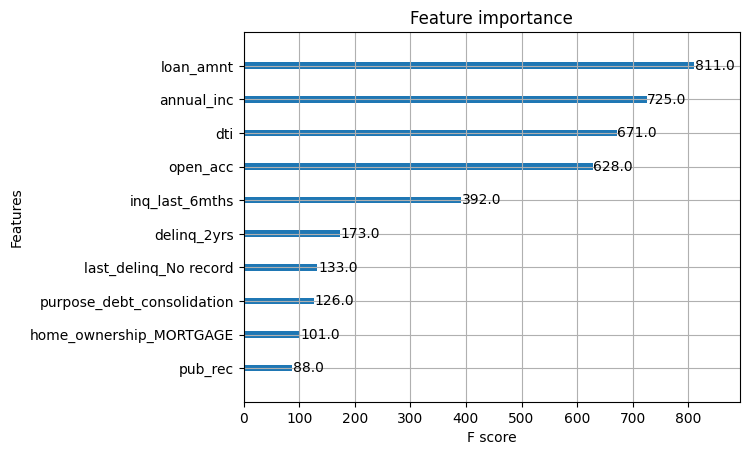

In [29]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(16,10))
plot_importance(model,max_num_features=10)
plt.show()

In [30]:
X_importantOnly = X[['loan_amnt', 'annual_inc', 'dti', 'open_acc', 'inq_last_6mths']]

cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = XGBClassifier()
# evaluate model
scores = cross_validate(model, X_importantOnly, y, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
print(pd.DataFrame(scores))

     fit_time  score_time  test_accuracy  test_precision  test_recall  \
0  168.730653    0.917677       0.891746        0.931668     0.845261   
1  169.861625    0.970003       0.892132        0.933281     0.844361   
2  176.951229    0.979944       0.892217        0.932698     0.844955   
3  178.649415    0.954975       0.888908        0.929025     0.842105   
4   91.573106    0.930740       0.891251        0.933012     0.844091   

   test_f1_score  
0       0.886364  
1       0.886597  
2       0.886661  
3       0.883432  
4       0.886327  


In [31]:
model.fit(X_importantOnly,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [32]:
import pickle

pickle.dump(model, open("xgb_classified.sav", "wb"))
